In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r'/Users/nithyasanthoshini/Downloads/Iris.csv')

In [3]:
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [5]:
df.shape

(150, 6)

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


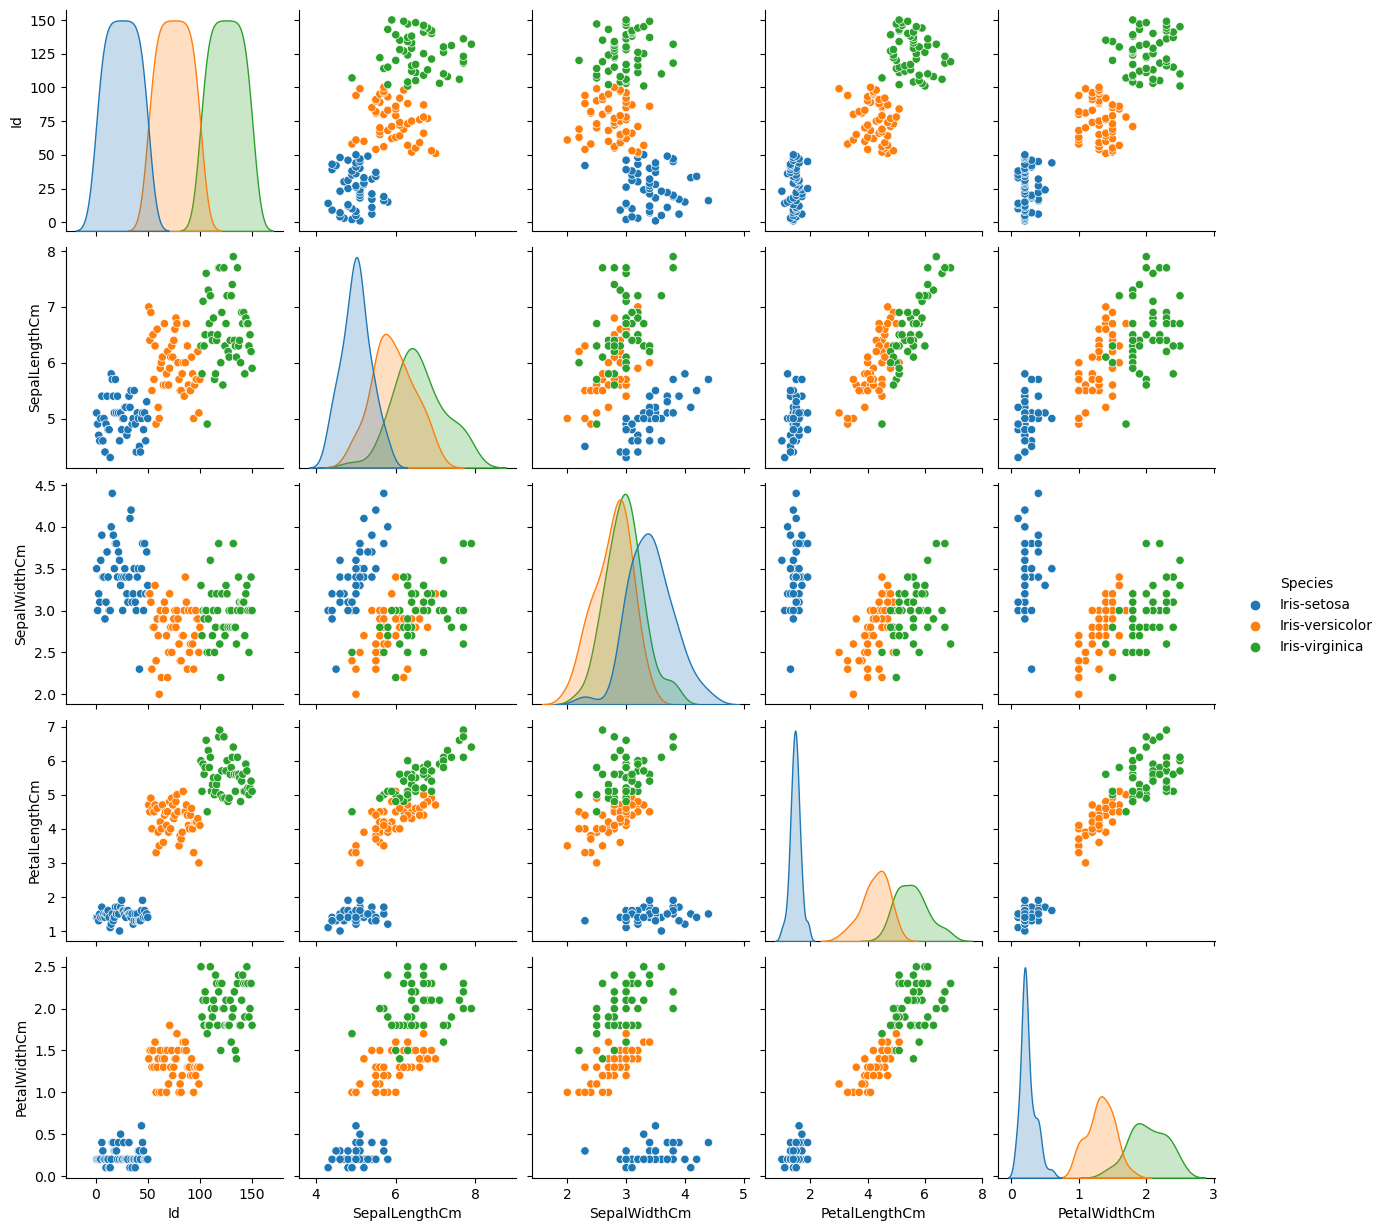

In [7]:
sns.pairplot(df,hue='Species')

In [8]:
y = df['Species']
x = df[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]

In [32]:
x.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=23)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=23)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(112, 4) (112,)
(38, 4) (38,)


In [38]:
df['SepalLengthCm'].mean()

5.843333333333334

## Feature Engineering

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_transformed = scaler.fit_transform(x_train)

In [40]:
print("Number of Numerical Features: ",scaler.n_features_in_)
print("Mean of the each column: ",scaler.mean_)
print("STD of each column: ",np.sqrt(scaler.var_))

Number of Numerical Features:  4
Mean of the each column:  [5.83166667 3.03       3.79833333 1.21916667]
STD of each column:  [0.82734347 0.44508426 1.75399465 0.7541326 ]


In [41]:
print("mean_sepal_length: ", df['SepalLengthCm'].mean())
print("median_sepal_length: ", df['SepalLengthCm'].median())

mean_sepal_length:  5.843333333333334
median_sepal_length:  5.8


In [21]:
df['SepalWidthCm'].min()

2.0

In [22]:
std_petal_length = df['PetalLengthCm'].std()

In [23]:
std_petal_length

1.7644204199522617

In [24]:
total_data_points = len(df)
print("Total data points:", total_data_points)

Total data points: 150


In [26]:
cardinality_species = df['Species'].nunique()
cardinality_species

3

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train_transformed,y_train)

LogisticRegression()

In [45]:
x_test_transformed = scaler.fit_transform(x_test)

y_pred = classifier.predict(x_test_transformed)

In [46]:
from sklearn import metrics
metrics.accuracy_score(y_pred,y_test)

1.0

In [48]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train_transformed, y_train)

DecisionTreeClassifier()

In [49]:
x_test_transformed = scaler.fit_transform(x_test)

y_pred = classifier.predict(x_test_transformed)

In [50]:
from sklearn import metrics
metrics.accuracy_score(y_pred,y_test)

0.9666666666666667

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_transformed, y_train)


KNeighborsClassifier()

In [53]:
x_test_transformed = scaler.fit_transform(x_test)

y_pred = classifier.predict(x_test_transformed)

In [54]:
from sklearn import metrics
metrics.accuracy_score(y_pred,y_test)

0.9666666666666667

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_transformed, y_train)


RandomForestClassifier(random_state=42)

In [57]:
x_test_transformed = scaler.fit_transform(x_test)

y_pred = classifier.predict(x_test_transformed)

In [58]:
from sklearn import metrics
metrics.accuracy_score(y_pred,y_test)

0.9666666666666667

### Build a Logistic Regression Model which uses 'PetalWidthCm' and 'SepalLengthCm' only as input variables to predict the 'Species'. Apply 70-30 split and standardize the data. Report the Accuracy of the model.

In [59]:
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [69]:
y = df['Species']
X = df[['SepalLengthCm','PetalWidthCm']]

In [70]:
X.head()

SepalLengthCm  PetalWidthCm
0            5.1           0.2
1            4.9           0.2
2            4.7           0.2
3            4.6           0.2
4            5.0           0.2

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(105, 2) (105,)
(45, 2) (45,)


In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

In [78]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed,y_train)

LogisticRegression()

In [79]:
X_test_transformed = scaler.fit_transform(X_test)

y_pred = classifier.predict(X_test_transformed)

In [80]:
from sklearn import metrics
metrics.accuracy_score(y_pred,y_test)

0.9111111111111111

In [91]:
from sklearn.metrics import accuracy_score
X = df[['PetalWidthCm', 'SepalLengthCm']]
y = df['Species']

# Splitting the dataset into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predicting the labels for the test set
y_pred = model.predict(X_test_scaled)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Logistic Regression model:", accuracy)

Accuracy of the Logistic Regression model: 1.0
